<a href="https://colab.research.google.com/github/LKSfiuza/Machine-Learning-projects/blob/main/Fenotipagem_de_tomateiro_resistente_%C3%A0_requeima_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# Importando o data set e separando as colunas alvos
df = pd.read_csv('dataset_problema2.csv')

X = df.drop(['id', 'Severidade'], axis = 1)
y = df['Severidade']

In [30]:
X

,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,SR_d01,NDVI_d04,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08
0,0.806955,1.210392,0.705323,19513.85630,10.557411,0.774359,1.161514,0.717367,30041.91766,8.531835,0.777758,1.166604,0.680269,22731.09954,8.380453,0.725521,1.088240,0.669113,16190.82038,6.491860
1,0.789403,1.184062,0.688353,17859.92417,9.527958,0.757559,1.136312,0.706716,26529.38283,7.888508,0.737634,1.106409,0.653475,17483.16681,7.039555,0.701538,1.052262,0.651048,13607.31327,5.889840
2,0.806006,1.208966,0.698522,18325.86796,10.450621,0.776762,1.165121,0.712256,35348.89095,8.872072,0.757991,1.136947,0.663469,18970.25945,7.691801,0.721819,1.082688,0.654506,16312.51025,6.385158
3,0.778408,1.167566,0.674224,16130.88569,9.135821,0.755313,1.132947,0.697300,30860.23050,7.873267,0.731638,1.097415,0.648051,15867.27075,6.888080,0.723709,1.085521,0.659776,15024.84460,6.503054
4,0.777937,1.166863,0.670604,17315.57673,8.797762,0.765304,1.147933,0.699105,30874.50847,8.130076,0.777302,1.165921,0.678815,23387.23253,8.498031,0.782553,1.173796,0.707183,22071.41814,8.726001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.771956,1.157887,0.684271,15544.34528,8.793058,0.756874,1.135286,0.716099,29284.26304,7.874621,0.736759,1.105095,0.676929,15552.39493,7.002859,0.721953,1.082884,0.678242,13753.59426,6.400156
128,0.684094,1.026101,0.579705,14363.76139,5.485155,0.683368,1.025026,0.621754,21390.94521,5.440783,0.698290,1.047398,0.612533,15864.07369,5.836134,0.722138,1.083168,0.646372,16276.04763,6.535245
129,0.702853,1.054238,0.596766,14282.54195,6.243612,0.703867,1.055777,0.637277,23944.36106,6.083072,0.706356,1.059496,0.612366,16146.96220,6.102729,0.715297,1.072908,0.632440,16155.19752,6.366358
130,0.649085,0.973586,0.556922,12279.07652,4.789961,0.651537,0.977283,0.607133,21376.18619,4.800934,0.670120,1.005140,0.587082,13652.41571,5.173874,0.699264,1.048856,0.619211,14888.57394,5.873620


In [31]:
# Separar dados de treinamento e de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# Padronizar os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X_train.columns
X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X_train.columns

In [44]:

# Seleção de features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

max_f = 20

lista_score = []

for i in range(1, max_f + 1):

  modelo_linear = LinearRegression()

  selector = RFE(modelo_linear, n_features_to_select = i, step = 1)

  selector = selector.fit(X_train_sc, y_train)

  mask = selector.support_

  # Selecionando as features mais relevantes

  features = X_train_sc.columns

  sel_features = features[mask]

  # Guardando as Features mais importantes

  X_sel = X_train_sc[sel_features]

  score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2')

  print(score.mean())

  lista_score.append(np.mean(score))



-0.06445199150879911
0.09396486029263365
0.6727804225015419
0.726672062129073
0.8223245283790293
0.8233753596097613
0.8202942847768545
0.8160171069363862
0.8642534971610811
0.8655536026351045
0.8592050402770244
0.8626245070274547
0.8617649200609072
0.8568329558908353
0.85515608058196
0.8539354093341999
0.8498948606437716
0.8484410541107404
0.843880605104897
0.8417215821030458


<function matplotlib.pyplot.show(close=None, block=None)>

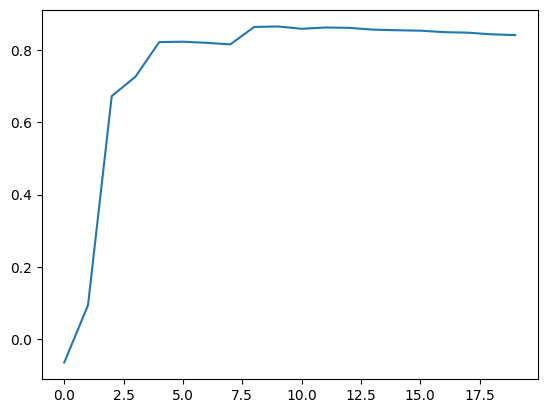

In [45]:
# Realizando o grafico

import matplotlib.pyplot as plt

plt.plot(lista_score)
plt.show

In [46]:
# Seleção final de features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

modelo_linear = LinearRegression()

selector = RFE(modelo_linear, n_features_to_select = 10, step = 1)

selector = selector.fit(X_train_sc, y_train)

mask = selector.support_

# Selecionando as features mais relevantes

features = X_train_sc.columns

sel_features = features[mask]

# Guardando as Features mais importantes

X_sel = X_train_sc[sel_features]

score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2')

print(score.mean())



0.8655536026351045


In [47]:
# Observando quais sao as melhores features

print(sel_features)

Index(['NDVI_d28', 'SAVI_d28', 'NDVI_d01', 'SAVI_d01', 'NDVI_d04', 'SAVI_d04',
       'NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'SR_d08'],
      dtype='object')


In [48]:
# Realizar a validação cruzada

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

modelo_linear = LinearRegression()

score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2')

print(score.mean())

0.8655536026351045


In [49]:
# Modelo final - Regressão linear multipla

modelo_linear = LinearRegression()

modelo_linear.fit(X_sel, y_train)


LinearRegression()

In [51]:
# Testar nos dados de teste

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_pred = modelo_linear.predict(X_test_sc[sel_features])

r2 = modelo_linear.score(X_test_sc[sel_features], y_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae = mean_absolute_error(y_test, y_pred)

print('R2', r2)
print('RMSE', rmse)
print('MAE', mae)


R2 0.887634277870405
RMSE 7.539476072278346
MAE 6.344066348950323


               0
0   82539.116350
1  -82550.790626
2       1.466360
3      10.762845
4       2.678125
5   -1654.549504
6    1670.648425
7       4.759410
8      -3.007576
9      -3.613083
10 -46714.526734
11  46702.342638
12      3.730530
13     -5.505806
14      3.043735
15  87523.254306
16 -87508.202037
17     -9.696523
18     10.193333
19    -31.998883
